# Box Plots and their uses - an investigation

## Introduction   
This project will examine the Box & Whisker Plot (commonly known as the box plot). I'll look at it's history, where & why it's used and how it compares to other ways of displaying data. I will demonstrate the use of the box plot using a dataset and explain the terminology surrounding it's use.

### History of the Boxplot
Box plots are best known through the work of the American mathematician, John Wilder Tukey (1970, 1972, 1977), who introduced them in his 1977 book "Exploratory Data Analysis".     
![John Tukey](https://upload.wikimedia.org/wikipedia/en/thumb/e/e9/John_Tukey.jpg/220px-John_Tukey.jpg)  
I have, however, come across some discussion as to whether Tukey was actually the first to use them. __[This post](https://stats.stackexchange.com/questions/369393/whats-the-history-of-box-plots-and-how-did-the-box-and-whiskers-design-evolv)__ on stackexchange gives a comprehensive history. It appears that the idea of showing the median & quartiles as basic summaries predates Tukey's work, having been used by the geographer Percy Robert Crowe as far back as 1933. Even earlier, Arthur Lyon Bowley recommended to use minimum and maximum and 10, 25, 50, 75 and 90% points as a basis for graphical summary (1910, 1952).


### What is a boxplot
The box plot is a standardised way of displaying the distribution of data, splitting it into quartiles. Quartiles divide a dataset into four equal parts. The values that divide each part are called the first, second & third quartiles respectively. The first quartile is the 25th percentile, i.e. 25% of the data falls below this line. The second quartile is the 50th percentile, or median - 50% of the data falls below this line. The third quartile is the 75% percentile - 75% of the data falls below this line. In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). The IQR lets us know how 'spread out' the values are. A segment inside the rectangle shows the median and "whiskers" above and below the box show the locations of the minimum and maximum.  One whisker goes from the first quartile to the smallest non-outlier value (minimum), and the other goes from the third quartile to the highest non-outlier value (maximum).   
The 'outliers' are points that lie outside the expected ranges. Any value that lies more than one and a half times the length of the box from either end of the box is an outlier. 1.5 times the IQR was selected by John Tukey as the demarkation line for outliers when he wrote about the box and whisker plot in 1977, and it has been used ever since. For normal distribution data it means that usually only about one percent of the data will be outliers.   



![Simple Boxplot](http://www.physics.csbsju.edu/stats/simple.box.defs.gif)




### Use of the boxplot
I will use a dataset made up of salary information for a Third Level Institute to demonstrate the use of the boxplot. I extracted the dataset from the GMIT staff database (raw data is in the CSV file contained in the data folder in this project). When inporting the dataset below I excluded two categories of staff, as there was little or no variety in the salaries for these categories of staff, thus rendering the data unsuitable for a boxplot.

In [1]:
#Pandas is a Python package for data frames
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset, excluding one of the categories - canteen, display 20 lines
df = pd.read_csv("https://raw.githubusercontent.com/paulacduffy/boxplotsproject/master/Data/salary.csv")
df = df[df.Category != "CANTEEN"]
ndf = df[df.Category != "SUPPORT"]
ndf.head(n=20)

,Category,Salary,Gender
0,ACADEMIC,51502,Male
1,ACADEMIC,51502,Male
2,ACADEMIC,51502,Female
3,ACADEMIC,51502,Female
4,ACADEMIC,48840,Male
5,ACADEMIC,47504,Male
6,ACADEMIC,50178,Male
7,ACADEMIC,51502,Male
8,ACADEMIC,50178,Male
9,ACADEMIC,46165,Female


We can create a simple boxplot using pandas, as shown below:

In [3]:
boxplot = ndf.boxplot(by = "Category", grid=False, rot=45, fontsize=15)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


As you can see, it doesn't look great. Seaborn is a better choice for boxplots:

<function matplotlib.pyplot.show>

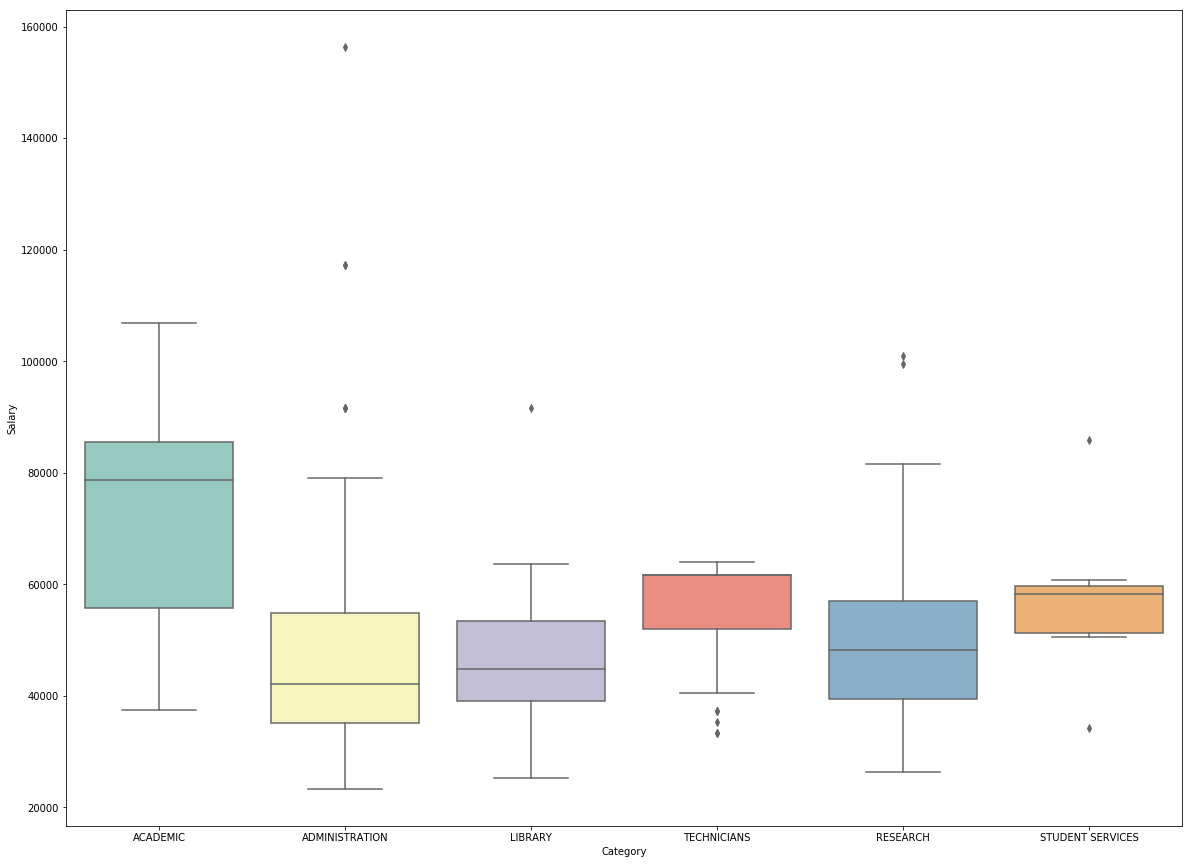

In [5]:
%matplotlib inline
plt.figure(figsize=(20,15))
sns.boxplot(x="Category", y="Salary", data=ndf, palette="Set3")
plt.show

In [9]:
%matplotlib inline
sns.boxplot(x="Category", y="Salary", hue="Gender", data=ndf, palette="Set3")
plt.show

ValueError: Could not interpret input 'Gender'

## References   

http://www.physics.csbsju.edu/stats/box2.html   
https://stattrek.com/statistics/dictionary.aspx?definition=boxplot   
https://www.purplemath.com/modules/boxwhisk3.htm   
